# What Affects the Ratings?

**By Li-Yen Hsu (11/08/2017)**
<br><br>
In this notebook, I will focus on data exploration, looking for correlations within the data. It's obvious that the main factors that affect the ratings of restaurants should be (1) how delicious the food is, and (2) how well a customer is served. These two are definitely not in the data. But some of the features of a restaurant still have some influence on the ratings. For a content-based recommender system, finding the relevant features is important for improving the rating prediction.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns

pd.set_option('mode.chained_assignment', None)

# Note that there are no NANs in these data; '?' is
# used when there is missing information
accepts = pd.read_csv('data/chefmozaccepts.csv')
cuisine = pd.read_csv('data/chefmozcuisine.csv')
hours = pd.read_csv('data/chefmozhours4.csv')
parking = pd.read_csv('data/chefmozparking.csv')
geo = pd.read_csv('data/geoplaces2.csv') 
usercuisine = pd.read_csv('data/usercuisine.csv')
payment = pd.read_csv('data/userpayment.csv')
profile = pd.read_csv('data/userprofile.csv')
rating = pd.read_csv('data/rating_final.csv')

## Data Preprocessing ##
Let's first inspect each of these data frames.

In [2]:
accepts.head()

,placeID,Rpayment
0,135110,cash
1,135110,VISA
2,135110,MasterCard-Eurocard
3,135110,American_Express
4,135110,bank_debit_cards


In [3]:
print("There are {} unique placeID's.".format(len(accepts.placeID.unique())))
print("There are {} unique Rpayment categories:".format(len(accepts.Rpayment.unique())))
print(accepts.Rpayment.unique())

There are 615 unique placeID's.
There are 12 unique Rpayment categories:
['cash' 'VISA' 'MasterCard-Eurocard' 'American_Express' 'bank_debit_cards'
 'checks' 'Discover' 'Carte_Blanche' 'Diners_Club' 'Visa'
 'Japan_Credit_Bureau' 'gift_certificates']


In [4]:
cuisine.head()

,placeID,Rcuisine
0,135110,Spanish
1,135109,Italian
2,135107,Latin_American
3,135106,Mexican
4,135105,Fast_Food


In [5]:
print("There are {} unique placeID's.".format(len(cuisine.placeID.unique())))
print("There are {} unique Rcuisine categories:".format(len(cuisine.Rcuisine.unique())))
print(cuisine.Rcuisine.unique())

There are 769 unique placeID's.
There are 59 unique Rcuisine categories:
['Spanish' 'Italian' 'Latin_American' 'Mexican' 'Fast_Food' 'Burgers'
 'Dessert-Ice_Cream' 'Hot_Dogs' 'Steaks' 'Asian' 'International'
 'Mongolian' 'Vegetarian' 'Brazilian' 'Cafe-Coffee_Shop' 'Cafeteria'
 'Contemporary' 'Deli-Sandwiches' 'Diner' 'Japanese' 'Sushi' 'Seafood'
 'Chinese' 'Bar' 'Bar_Pub_Brewery' 'Pizzeria' 'Mediterranean' 'American'
 'Family' 'Caribbean' 'African' 'Breakfast-Brunch' 'Regional' 'Afghan'
 'Bakery' 'Game' 'Armenian' 'Vietnamese' 'Korean' 'Thai' 'Barbecue'
 'Polish' 'Dutch-Belgian' 'French' 'German' 'Southwestern' 'Persian'
 'Ethiopian' 'Juice' 'Soup' 'Continental-European' 'Greek' 'Southern'
 'Eastern_European' 'California' 'Bagels' 'Turkish' 'Organic-Healthy'
 'Fine_Dining']


In [6]:
hours.head()

,placeID,hours,days
0,135111,00:00-23:30;,Mon;Tue;Wed;Thu;Fri;
1,135111,00:00-23:30;,Sat;
2,135111,00:00-23:30;,Sun;
3,135110,08:00-19:00;,Mon;Tue;Wed;Thu;Fri;
4,135110,00:00-00:00;,Sat;


In [7]:
print("There are {} unique placeID's.".format(len(hours.placeID.unique())))

There are 694 unique placeID's.


In [8]:
parking.head()

,placeID,parking_lot
0,135111,public
1,135110,none
2,135109,none
3,135108,none
4,135107,none


In [9]:
print("There are {} unique placeID's.".format(len(parking.placeID.unique())))
print("There are {} unique parking_lot categories:".format(len(parking.parking_lot.unique())))
print(parking.parking_lot.unique())

There are 675 unique placeID's.
There are 7 unique parking_lot categories:
['public' 'none' 'yes' 'valet parking' 'fee' 'street' 'validated parking']


In [10]:
geo.head()

,placeID,latitude,longitude,the_geom_meter,name,address,city,state,country,fax,...,alcohol,smoking_area,dress_code,accessibility,price,url,Rambience,franchise,area,other_services
0,134999,18.915421,-99.184871,0101000020957F000088568DE356715AC138C0A525FC46...,Kiku Cuernavaca,Revolucion,Cuernavaca,Morelos,Mexico,?,...,No_Alcohol_Served,none,informal,no_accessibility,medium,kikucuernavaca.com.mx,familiar,f,closed,none
1,132825,22.147392,-100.983092,0101000020957F00001AD016568C4858C1243261274BA5...,puesto de tacos,esquina santos degollado y leon guzman,s.l.p.,s.l.p.,mexico,?,...,No_Alcohol_Served,none,informal,completely,low,?,familiar,f,open,none
2,135106,22.149709,-100.976093,0101000020957F0000649D6F21634858C119AE9BF528A3...,El Rinc�n de San Francisco,Universidad 169,San Luis Potosi,San Luis Potosi,Mexico,?,...,Wine-Beer,only at bar,informal,partially,medium,?,familiar,f,open,none
3,132667,23.752697,-99.163359,0101000020957F00005D67BCDDED8157C1222A2DC8D84D...,little pizza Emilio Portes Gil,calle emilio portes gil,victoria,tamaulipas,?,?,...,No_Alcohol_Served,none,informal,completely,low,?,familiar,t,closed,none
4,132613,23.752903,-99.165076,0101000020957F00008EBA2D06DC8157C194E03B7B504E...,carnitas_mata,lic. Emilio portes gil,victoria,Tamaulipas,Mexico,?,...,No_Alcohol_Served,permitted,informal,completely,medium,?,familiar,t,closed,none


In [11]:
print("There are {} unique placeID's.".format(len(geo.placeID.unique())))

There are 130 unique placeID's.


In [12]:
usercuisine.head()

,userID,Rcuisine
0,U1001,American
1,U1002,Mexican
2,U1003,Mexican
3,U1004,Bakery
4,U1004,Breakfast-Brunch


In [13]:
print("There are {} unique userID's.".format(len(usercuisine.userID.unique())))
print("There are {} unique Rcuisine categories:".format(len(usercuisine.Rcuisine.unique())))
print(usercuisine.Rcuisine.unique())

There are 138 unique userID's.
There are 103 unique Rcuisine categories:
['American' 'Mexican' 'Bakery' 'Breakfast-Brunch' 'Japanese' 'Contemporary'
 'Bagels' 'Cafe-Coffee_Shop' 'Continental-European' 'Cafeteria' 'Family'
 'Juice' 'Hawaiian' 'Hot_Dogs' 'Latin_American' 'Korean' 'Italian' 'Diner'
 'Fast_Food' 'Deli-Sandwiches' 'Regional' 'Fusion' 'Portuguese'
 'Indian-Pakistani' 'Eastern_European' 'Lebanese' 'Moroccan' 'Barbecue'
 'Polynesian' 'Polish' 'Chinese' 'Pizzeria' 'Burgers' 'Afghan'
 'Middle_Eastern' 'Mongolian' 'Bar' 'Cuban' 'Tex-Mex' 'Spanish' 'Soup'
 'Sushi' 'Game' 'Doughnuts' 'Australian' 'Asian' 'Dessert-Ice_Cream'
 'Seafood' 'Turkish' 'Organic-Healthy' 'Steaks' 'Mediterranean' 'British'
 'Austrian' 'Israeli' 'Russian-Ukrainian' 'Malaysian' 'Vegetarian'
 'Peruvian' 'Tapas' 'Eclectic' 'African' 'Basque' 'Canadian' 'Irish'
 'Southwestern' 'Tea_House' 'International' 'Pacific_Northwest' 'German'
 'Persian' 'Ethiopian' 'Romanian' 'Cambodian' 'Pacific_Rim' 'Tunisian'
 'Filipino

In [14]:
payment.head()

,userID,Upayment
0,U1001,cash
1,U1002,cash
2,U1003,cash
3,U1004,cash
4,U1004,bank_debit_cards


In [15]:
print("There are {} unique userID's.".format(len(payment.userID.unique())))
print("There are {} unique Upayment categories:".format(len(payment.Upayment.unique())))
print(payment.Upayment.unique())

There are 133 unique userID's.
There are 5 unique Upayment categories:
['cash' 'bank_debit_cards' 'MasterCard-Eurocard' 'VISA' 'American_Express']


In [16]:
profile.head()

,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height
0,U1001,22.139997,-100.978803,false,abstemious,informal,family,on foot,single,independent,1989,variety,thrifty-protector,none,student,black,69,medium,1.77
1,U1002,22.150087,-100.983325,false,abstemious,informal,family,public,single,independent,1990,technology,hunter-ostentatious,Catholic,student,red,40,low,1.87
2,U1003,22.119847,-100.946527,false,social drinker,formal,family,public,single,independent,1989,none,hard-worker,Catholic,student,blue,60,low,1.69
3,U1004,18.867000,-99.183000,false,abstemious,informal,family,public,single,independent,1940,variety,hard-worker,none,professional,green,44,medium,1.53
4,U1005,22.183477,-100.959891,false,abstemious,no preference,family,public,single,independent,1992,none,thrifty-protector,Catholic,student,black,65,medium,1.69


In [17]:
print("There are {} unique userID's.".format(len(profile.userID.unique())))

There are 138 unique userID's.


In [18]:
rating.head()

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2


In [19]:
print("There are {} unique userID's.".format(len(rating.userID.unique())))
print("There are {} unique placeID's.".format(len(rating.placeID.unique())))
print("There are {} * 3 ratings.".format(len(rating)))

There are 138 unique userID's.
There are 130 unique placeID's.
There are 1161 * 3 ratings.


In [20]:
rating.iloc[:,2:].describe()

,rating,food_rating,service_rating
count,1161.000000,1161.000000,1161.000000
mean,1.199828,1.215332,1.090439
std,0.773282,0.792294,0.790844
min,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000
75%,2.000000,2.000000,2.000000
max,2.000000,2.000000,2.000000


Now let's see how many restaurants and users there are in total.

In [21]:
res_all = np.concatenate((accepts.placeID, cuisine.placeID, 
                          hours.placeID, parking.placeID, geo.placeID))
res_all = np.sort( np.unique(res_all) ) # All the placeID's

print("There are {} restaurants.".format(len(res_all)))

There are 938 restaurants.


In [22]:
user_all = np.concatenate((usercuisine.userID, payment.userID, profile.userID))
user_all = np.sort( np.unique(user_all) ) # All the userID's

print("There are {} users.".format(len(user_all)))

There are 138 users.


Only 130 out of 938 restaurants have ratings. I will later work on these 130 only because it's not wise to recommend a restaurant without ratings anyway. I will now create three data frames for the three types of rating, each of which will have a shape of (938, 138). A restaurant-user pair without a rating will be recorded as -1 (to be different from 0, the lowest rating).

In [23]:
overall_rating = pd.DataFrame( np.zeros((len(res_all),len(user_all)))-1.0, 
                              columns=user_all, index=res_all )
food_rating = overall_rating.copy()
service_rating = overall_rating.copy() 

for r, u, o, f, s in zip(rating.placeID, rating.userID, rating.rating, rating.food_rating, 
                         rating.service_rating):
    overall_rating.loc[r,u] = o
    food_rating.loc[r,u] = f
    service_rating.loc[r,u] = s

# This tells us whether a restaurant-user pair has a rating. 0 means No and 1 means Yes.
review = pd.DataFrame( np.zeros(overall_rating.shape), columns=user_all, index=res_all)
review[overall_rating >= 0] = 1

I'll be looking at the restaurant features from **cuisine, parking** and **geo**. The payment options and business hours should have very little effects on the rating, so I won't look into **accepts** and **hours** here.

In [24]:
# use dummy variables for different cuisine categories of the restaurants
res_cuisine = pd.get_dummies(cuisine,columns=['Rcuisine'])

# remove duplicate restaurant ID's. 
# A restaurant with multiple cuisine categories would have multiple columns equal 1
res_cuisine = res_cuisine.groupby('placeID',as_index=False).sum()

# use dummy variables for different cuisine categories of the restaurants
res_parking = pd.get_dummies(parking,columns=['parking_lot'])

# remove duplicate restaurant ID's. 
# A restaurant with multiple parking options would have multiple columns equal 1
res_parking = res_parking.groupby('placeID',as_index=False).sum()

Let's select some columns from **geo** that might affect the ratings.

In [25]:
geo.columns.values

array(['placeID', 'latitude', 'longitude', 'the_geom_meter', 'name',
       'address', 'city', 'state', 'country', 'fax', 'zip', 'alcohol',
       'smoking_area', 'dress_code', 'accessibility', 'price', 'url',
       'Rambience', 'franchise', 'area', 'other_services'], dtype=object)

In [26]:
# These are the ones that I think might be relevant
res_features = geo[['placeID','alcohol','smoking_area','other_services','price','dress_code',
               'accessibility','area']]

df_res = pd.DataFrame({'placeID': res_all})
df_res = pd.merge(left=df_res, right=res_cuisine, how="left", on="placeID")
df_res = pd.merge(left=df_res, right=res_parking, how="left", on="placeID")
df_res = pd.merge(left=df_res, right=res_features, how="left", on="placeID")

From now on I will use four (130,138) arrays, **R, Y_overall, Y_food** and **Y_service**, for their ratings, where the axis=0 dimension is for the restaurants and the axis=1 dimension is for the consumers. The elements of **R** are either 0 or 1, showing whether a restaurant-user pair has a rating. The information of the restaurants will be recorded in a (130,n_feature) array, **X**.

In [27]:
# The placeID's for the 130 restaurants with ratings
res_rated = res_all[np.sum(review,axis=1) > 0] 

# tells us whether a restaurant-user pair has a rating. 0 means No and 1 means Yes.
R = review.loc[res_rated].values  # shape = (130,138)

# These also have a shape of (130, 138)
Y_overall = overall_rating.loc[res_rated].values
Y_food  = food_rating.loc[res_rated].values
Y_service = service_rating.loc[res_rated].values

# select the indices of "df_res" where a restaurant has ratings
index = [x in res_rated for x in df_res['placeID'].values]

# restaurant features for the 130 restaurants with ratings
X = df_res.loc[index, :].reset_index(drop=True)

X.isnull().sum() # all the NANs are from cuisine 

placeID                           0
Rcuisine_Afghan                  35
Rcuisine_African                 35
Rcuisine_American                35
Rcuisine_Armenian                35
Rcuisine_Asian                   35
Rcuisine_Bagels                  35
Rcuisine_Bakery                  35
Rcuisine_Bar                     35
Rcuisine_Bar_Pub_Brewery         35
Rcuisine_Barbecue                35
Rcuisine_Brazilian               35
Rcuisine_Breakfast-Brunch        35
Rcuisine_Burgers                 35
Rcuisine_Cafe-Coffee_Shop        35
Rcuisine_Cafeteria               35
Rcuisine_California              35
Rcuisine_Caribbean               35
Rcuisine_Chinese                 35
Rcuisine_Contemporary            35
Rcuisine_Continental-European    35
Rcuisine_Deli-Sandwiches         35
Rcuisine_Dessert-Ice_Cream       35
Rcuisine_Diner                   35
Rcuisine_Dutch-Belgian           35
Rcuisine_Eastern_European        35
Rcuisine_Ethiopian               35
Rcuisine_Family             

In [28]:
# fill all NANs with 0
X = X.fillna(0) 

# drop a feature if the entire column are 0
features_to_drop = X.columns.values[np.sum(X,axis=0) == 0] 
X = X.drop(features_to_drop, axis=1)

# drop placeID
X = X.drop(['placeID'], axis=1)

# There are the restaurant features we'll explore
X.columns.values 

array(['Rcuisine_American', 'Rcuisine_Armenian', 'Rcuisine_Bakery',
       'Rcuisine_Bar', 'Rcuisine_Bar_Pub_Brewery',
       'Rcuisine_Breakfast-Brunch', 'Rcuisine_Burgers',
       'Rcuisine_Cafe-Coffee_Shop', 'Rcuisine_Cafeteria',
       'Rcuisine_Chinese', 'Rcuisine_Contemporary', 'Rcuisine_Family',
       'Rcuisine_Fast_Food', 'Rcuisine_Game', 'Rcuisine_International',
       'Rcuisine_Italian', 'Rcuisine_Japanese', 'Rcuisine_Mediterranean',
       'Rcuisine_Mexican', 'Rcuisine_Pizzeria', 'Rcuisine_Regional',
       'Rcuisine_Seafood', 'Rcuisine_Vietnamese', 'parking_lot_none',
       'parking_lot_public', 'parking_lot_valet parking',
       'parking_lot_yes', 'alcohol', 'smoking_area', 'other_services',
       'price', 'dress_code', 'accessibility', 'area'], dtype=object)

Now let's select some of the user features that are related to the restaurant features

In [29]:
profile.columns.values

array(['userID', 'latitude', 'longitude', 'smoker', 'drink_level',
       'dress_preference', 'ambience', 'transport', 'marital_status',
       'hijos', 'birth_year', 'interest', 'personality', 'religion',
       'activity', 'color', 'weight', 'budget', 'height'], dtype=object)

**smoker**, **drink_level**, **transport**, **budget** and **dress_preference** are related to **smoking_area**, **alcohol**, **parking options** (**parking_lot_none**, **parking_lot_public**, **parking_lot_valet parking** and **parking_lot_yes**), **price**, and **dress_code**

In [30]:
user_info = profile[['smoker','drink_level','transport','budget','dress_preference']] 

print(user_info.smoker.value_counts())
print('\n')
print(user_info.drink_level.value_counts())
print('\n')
print(user_info.transport.value_counts())
print('\n')
print(user_info.budget.value_counts())
print('\n')
print(user_info.dress_preference.value_counts())

false    109
true      26
?          3
Name: smoker, dtype: int64


abstemious        51
casual drinker    47
social drinker    40
Name: drink_level, dtype: int64


public       82
car owner    35
on foot      14
?             7
Name: transport, dtype: int64


medium    91
low       35
?          7
high       5
Name: budget, dtype: int64


no preference    53
formal           41
informal         35
?                 5
elegant           4
Name: dress_preference, dtype: int64


Before exploring these data, I will combine "public" and "on foot" of **transport** into just one category, "no car", because these two types of people would feel the same about whether there is a parking lot. Similarly, "elegant" and "formal" of **dress_preference** will be merged to just one category, "formal".

In [31]:
user_info.transport = user_info.transport.replace({'public':'no car', 'on foot':'no car'})
user_info.dress_preference = user_info.dress_preference.replace({'elegant':'formal'})

## Exploratory Visualization
In order to see how the restaurant features affect the ratings, I will first get the mean rating for each restaurant. And then for each feature, I will show how the rating changes with different feature values. To do this, I will group the restaurants based on the different feature values and then average the mean ratings mentioned above for 
each group. Notice that what I do is **NOT** averaging all the ratings with the feature equals to a certain value. Instead, it is first getting the mean rating for each restaurant and then grouping. If the former approach were used, the mean rating of a group would be biased towards the restaurants with more ratings. This should be avoided because we want to treat every restaurant equally.

In [32]:
# Calculate the mean rating for each restaurant
def GetMean(Y,R):

    Y = Y*R
    mean =  (np.sum(Y, axis=1)/np.sum((R == 1.0), axis=1)).reshape(Y.shape[0],1)
    return mean

Y_overall_mean = GetMean(Y_overall,R)
Y_food_mean = GetMean(Y_food,R)
Y_service_mean = GetMean(Y_service,R)

In [33]:
# This is the function I'll use to plot and print the mean ratings of different 
# groups of restaurants based on different values of a given feature
def plot_mean_rating(df,rotate=False):
    
    n = df.shape[1]
    columns = df.columns.values
    
    if n > 1:
        y_overall = [ Y_overall_mean[df[i] == 1].mean() for i in columns ]
        y_food = [ Y_food_mean[df[i] == 1].mean() for i in columns ]
        y_service = [ Y_service_mean[df[i] == 1].mean() for i in columns ] 
        y = pd.DataFrame({'overall':y_overall, 'food':y_food, 'service':y_service},
                         columns=['overall','food','service'],index=columns) 
        ticks = columns
        
    else:
        values = df[columns[0]].unique()
        values = values[values != '?']
        y_overall = [ Y_overall_mean[df[columns[0]] == i].mean() for i in values ]
        y_food = [ Y_food_mean[df[columns[0]] == i].mean() for i in values ]
        y_service = [ Y_service_mean[df[columns[0]] == i].mean() for i in values ] 
        y = pd.DataFrame({'overall':y_overall, 'food':y_food, 'service':y_service},
                         columns=['overall','food','service'],index=values) 
        ticks = values
   
    fig = plt.figure()
    plt.plot(range(y.shape[0]),y['overall'],'-o',c='k',label='overall')
    plt.plot(range(y.shape[0]),y['food'],'-o',c='r',label='food')   
    plt.plot(range(y.shape[0]),y['service'],'-o',c='b',label='service')
    plt.xticks(range(y.shape[0]),ticks,fontsize=13)
    if rotate: plt.xticks(rotation=40)
    plt.yticks(fontsize=13) 
    if n == 1: plt.xlabel(columns[0],fontsize=15)
    plt.ylabel('mean rating',fontsize=15)
    plt.legend(fontsize=15)
    plt.show()
    
    print(y)

In [34]:
# This function is similar to the one above, but this time the result is split
# into different groups of users as well
def plot_mean_rating_split(df,userinfo,rotate=False):
    
    n = df.shape[1]
    columns = df.columns.values
    
    cases = userinfo.unique()
    cases = cases[cases != '?']
    
    num = len(cases)
    y = {}
    
    if n > 1:
        
        for i in range(num):
            
            index = (userinfo == cases[i])
            R_case = np.zeros(R.shape)
            R_case[:,index] = R[:,index]

            Y_overall_case = GetMean(Y_overall,R_case)
            Y_food_case = GetMean(Y_food,R_case)
            Y_service_case = GetMean(Y_service,R_case)
        
            isnan = np.isnan(Y_overall_case).reshape(-1)
            y_overall = [Y_overall_case[(df[j] == 1) & (isnan == False)].mean() for j in columns]
            y_food = [Y_food_case[(df[j] == 1) & (isnan == False)].mean() for j in columns]
            y_service = [Y_service_case[(df[j] == 1) & (isnan == False)].mean() for j in columns]
            
            y[cases[i]] = pd.DataFrame({'overall':y_overall, 'food':y_food, 'service':y_service}, 
                                   columns=['overall','food','service'],index=columns)
        ticks = columns

     
    else:
        
        for i in range(num):
            
            values = df[columns[0]].unique()
            values = values[values != '?']
            
            index = (userinfo == cases[i])
            R_case = np.zeros(R.shape)
            R_case[:,index] = R[:,index]

            Y_overall_case = GetMean(Y_overall,R_case)
            Y_food_case = GetMean(Y_food,R_case)
            Y_service_case = GetMean(Y_service,R_case)
        
            isnan = np.isnan(Y_overall_case).reshape(-1)
            y_overall = [Y_overall_case[(df[columns[0]] == j) & 
                        (isnan == False)].mean() for j in values]
            y_food = [Y_food_case[(df[columns[0]] == j) & 
                     (isnan == False)].mean() for j in values]
            y_service = [Y_service_case[(df[columns[0]] == j) & 
                        (isnan == False)].mean() for j in values]
                        
            y[cases[i]] = pd.DataFrame({'overall':y_overall, 'food':y_food, 'service':y_service}, 
                                       columns=['overall','food','service'],index=values)

        ticks = values
   

    f, (ax1, ax2, ax3) = plt.subplots(1,3, sharex=True, sharey=True, figsize=(24,6))
 
    color = ['k','r','b'] 

    for i in range(num):
        ax1.plot(range(len(ticks)),y[cases[i]]['overall'],'-o',c=color[i],label=cases[i])
        ax2.plot(range(len(ticks)),y[cases[i]]['food'],'-o',c=color[i],label=cases[i])
        ax3.plot(range(len(ticks)),y[cases[i]]['service'],'-o',c=color[i],label=cases[i])
    
    ax1.set_title('overall',fontsize=20)
    ax2.set_title('food',fontsize=20)
    ax3.set_title('service',fontsize=20)

    ax1.tick_params(labelsize=16)
    ax2.tick_params(labelsize=16)
    ax3.tick_params(labelsize=16)
    
    if rotate:
        ax1.set_xticks(range(len(ticks)))
        ax1.set_xticklabels(ticks, rotation=40)
        ax2.set_xticks(range(len(ticks)))
        ax2.set_xticklabels(ticks, rotation=40)
        ax3.set_xticks(range(len(ticks)))
        ax3.set_xticklabels(ticks, rotation=40)
    else:
        plt.xticks(range(len(ticks)),ticks)
                           
    if n == 1: 
        ax2.set_xlabel(columns[0],fontsize=20)
    
    ax1.set_ylabel('mean rating',fontsize=20)
    
    plt.legend(fontsize=20)
    plt.show()
    
    return y

Now I'll go over all the restaurant features that are stored in **X**

### Price

In [35]:
X.price.value_counts()

medium    60
low       45
high      25
Name: price, dtype: int64

In [36]:
user_info.budget.value_counts()

medium    91
low       35
?          7
high       5
Name: budget, dtype: int64

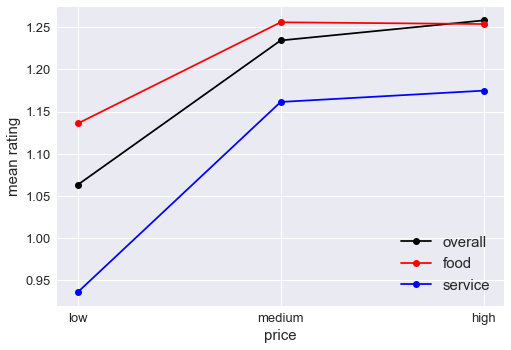

         overall      food   service
low     1.063059  1.135805  0.935632
medium  1.234342  1.255871  1.161361
high    1.258106  1.253816  1.174754


In [37]:
# mean rating as a function of price
plot_mean_rating(X[['price']])

/Users/lyh/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in divide
  """


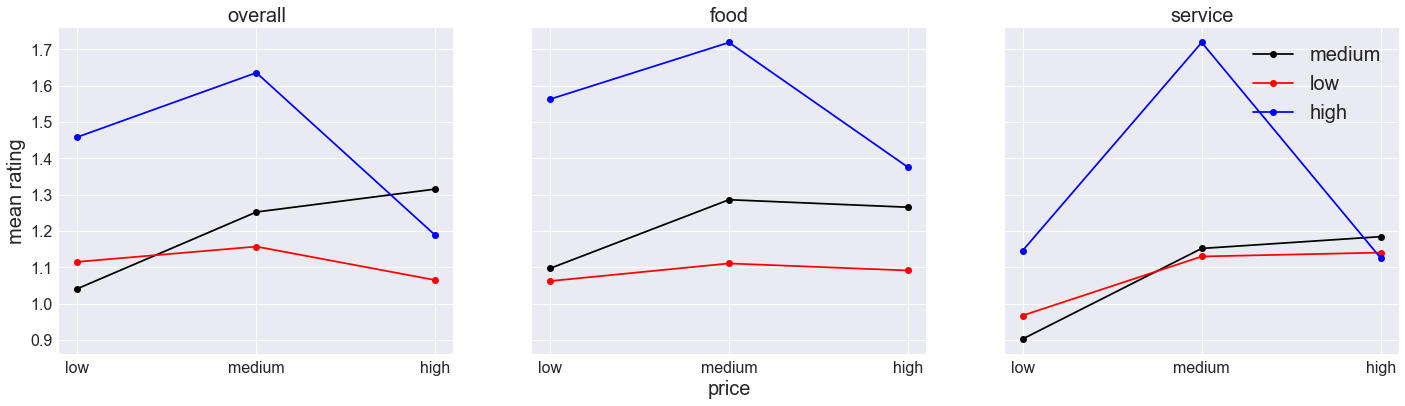

low budget:
         overall      food   service
low     1.114693  1.061776  0.966924
medium  1.156722  1.110335  1.129481
high    1.064394  1.090909  1.140152

medium budget:
         overall      food   service
low     1.040752  1.096643  0.902340
medium  1.251914  1.285747  1.151604
high    1.315073  1.265112  1.184063

high budget:
         overall     food   service
low     1.458333  1.56250  1.145833
medium  1.635417  1.71875  1.718750
high    1.187500  1.37500  1.125000


In [38]:
# mean rating as a function of price, split into three groups of consumers
# with low, medium, and high budget
y = plot_mean_rating_split(X[['price']],user_info.budget)

print('low budget:')
print(y['low'])
print('\nmedium budget:')
print(y['medium'])
print('\nhigh budget:')
print(y['high'])

**Observations: ** You get what you pay for? In general, restaurants with medium or high price have higher ratings (high ~ medium > low). However, the consumers with high budget actually prefer medium-price restaurants over high-price ones.

### Parking Options

In [39]:
columns = ['parking_lot_none','parking_lot_public', 'parking_lot_valet parking','parking_lot_yes']
X[columns].sum()

parking_lot_none             65.0
parking_lot_public           16.0
parking_lot_valet parking     3.0
parking_lot_yes              46.0
dtype: float64

In [40]:
X[columns].sum().sum()

130.0

The sum is 130, which means each of these 130 restaurants actually only has one parking option (there were restaurants without ratings that have multiple parking options).

In [41]:
user_info.transport.value_counts()

no car       96
car owner    35
?             7
Name: transport, dtype: int64

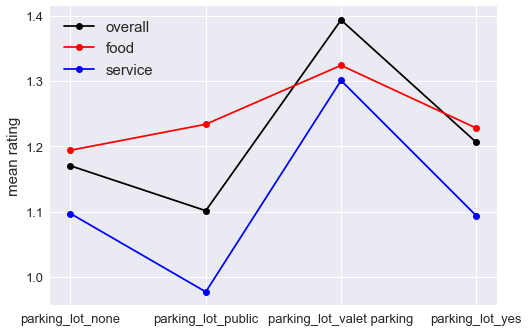

                            overall      food   service
parking_lot_none           1.170202  1.194014  1.097035
parking_lot_public         1.101438  1.233839  0.977173
parking_lot_valet parking  1.393519  1.324074  1.300926
parking_lot_yes            1.206176  1.227920  1.093676


In [42]:
# mean rating as a function of parking option
plot_mean_rating(X[columns])

/Users/lyh/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in divide
  """


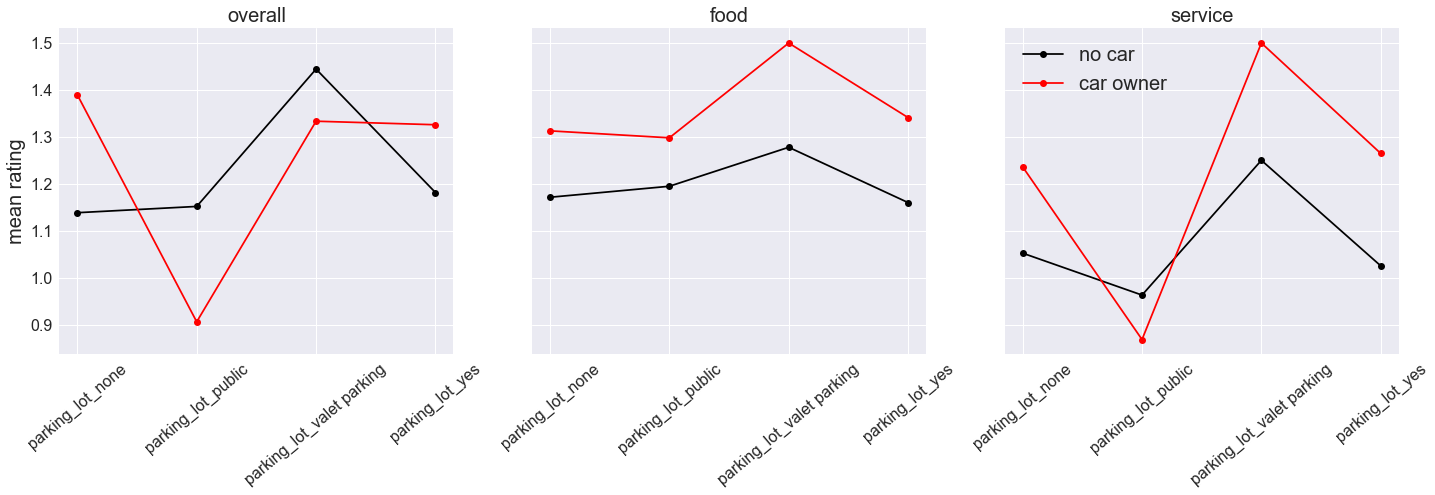

no car:
                            overall      food   service
parking_lot_none           1.138341  1.171273  1.052087
parking_lot_public         1.151683  1.194685  0.962748
parking_lot_valet parking  1.444444  1.277778  1.250000
parking_lot_yes            1.181364  1.159907  1.025061

car owner:
                            overall      food   service
parking_lot_none           1.389495  1.312778  1.236010
parking_lot_public         0.905782  1.297959  0.868027
parking_lot_valet parking  1.333333  1.500000  1.500000
parking_lot_yes            1.325813  1.341057  1.264634


In [43]:
# mean rating as a function of parking option, split into car owners and
# non car owners
y = plot_mean_rating_split(X[columns],user_info.transport,rotate=True)

print('no car:')
print(y['no car'])
print('\ncar owner:')
print(y['car owner'])

**Observations: ** (1) Surprisingly, public parking is the least popular one, and it's worse than no parking. (2) Valet parking is the most popular one, although there are only three restaurants with this option. (3) Food rating changes the least among all three types of ratings, which makes sense since it shouldn't be affected by parking options at all. (4) The trend of ratings from car owners is actually not very different from non car owners.
<br><br>
Is it possible that parking options don't matter? Let's see if the trend we see above can be explained by **price**, as we found previously that restaurants with medium or high price generally get higher ratings.


In [44]:
X.price[X['parking_lot_valet parking']==1].value_counts()

high    3
Name: price, dtype: int64

In [45]:
X.price[X['parking_lot_public']==1].value_counts()

medium    8
low       7
high      1
Name: price, dtype: int64

In [46]:
X.price[X['parking_lot_none']==1].value_counts()

low       31
medium    29
high       5
Name: price, dtype: int64

**Observations: ** Apparently the restaurants with valet parking are the expensive/high-class ones, which is why they are highly rated. The compositions of the restaurants with public parking and no parking are similar; about half of either group are low-price restaurants. So the different ratings between these two groups given by car owners might be real. Maybe it's because public parking is expensive? 

### Smoking Area

In [47]:
X.smoking_area.value_counts()

none             70
not permitted    25
section          24
permitted         9
only at bar       2
Name: smoking_area, dtype: int64

In [48]:
user_info.smoker.value_counts()

false    109
true      26
?          3
Name: smoker, dtype: int64

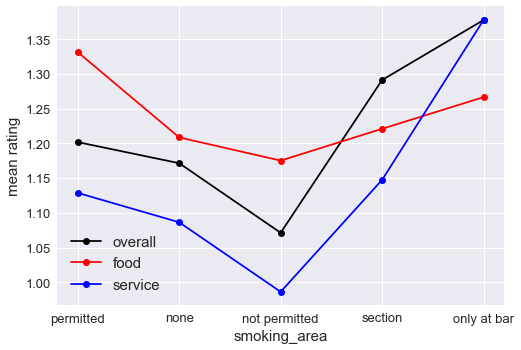

                overall      food   service
permitted      1.201852  1.331481  1.128704
none           1.171497  1.208648  1.086371
not permitted  1.071238  1.175244  0.986184
section        1.291368  1.221073  1.147479
only at bar    1.377778  1.266667  1.377778


In [49]:
# mean rating as a function of smoking area
plot_mean_rating(X[['smoking_area']])

/Users/lyh/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in divide
  """


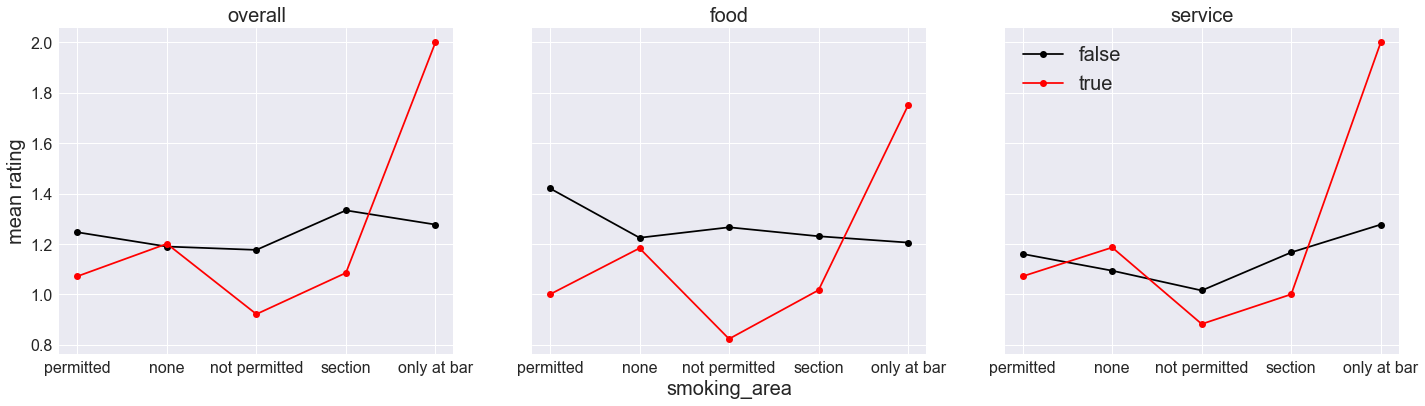

false:
                overall      food   service
permitted      1.246296  1.420370  1.160185
none           1.189544  1.224518  1.093734
not permitted  1.176252  1.265963  1.015098
section        1.333201  1.230433  1.166364
only at bar    1.276786  1.205357  1.276786

true:
                overall      food   service
permitted      1.071429  1.000000  1.071429
none           1.200585  1.183041  1.185965
not permitted  0.921190  0.822976  0.882024
section        1.085000  1.016667  1.000000
only at bar    2.000000  1.750000  2.000000


In [50]:
# mean rating as a function of smoking area, split into smokers and
# non smokers
y = plot_mean_rating_split(X[['smoking_area']],user_info.smoker)

print('false:')
print(y['false'])
print('\ntrue:')
print(y['true'])

**Observations: ** (1) Non smokers do not care much about smoking area. (2) For smokers, **only at bar** is very popular, while **not permitted** leads to very low ratings. (3) Surprisingly, **none** and **not permitted** have very different mean ratings. Originally I thought these two mean the same thing. It's probably because smokers can still find a place to smoke at those restaurants without a smoking area but are completely not allowed to do so at those **not permitted** ones.

### Alcohol

In [51]:
X.alcohol.value_counts()

No_Alcohol_Served    87
Wine-Beer            34
Full_Bar              9
Name: alcohol, dtype: int64

In [52]:
user_info.drink_level.value_counts()

abstemious        51
casual drinker    47
social drinker    40
Name: drink_level, dtype: int64

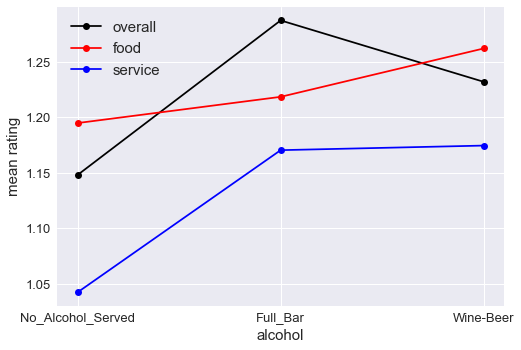

                    overall      food   service
No_Alcohol_Served  1.148075  1.194730  1.042417
Full_Bar           1.287124  1.218315  1.170311
Wine-Beer          1.231887  1.261840  1.174437


In [53]:
# mean rating as a function of alcohol
plot_mean_rating(X[['alcohol']])

/Users/lyh/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in divide
  """


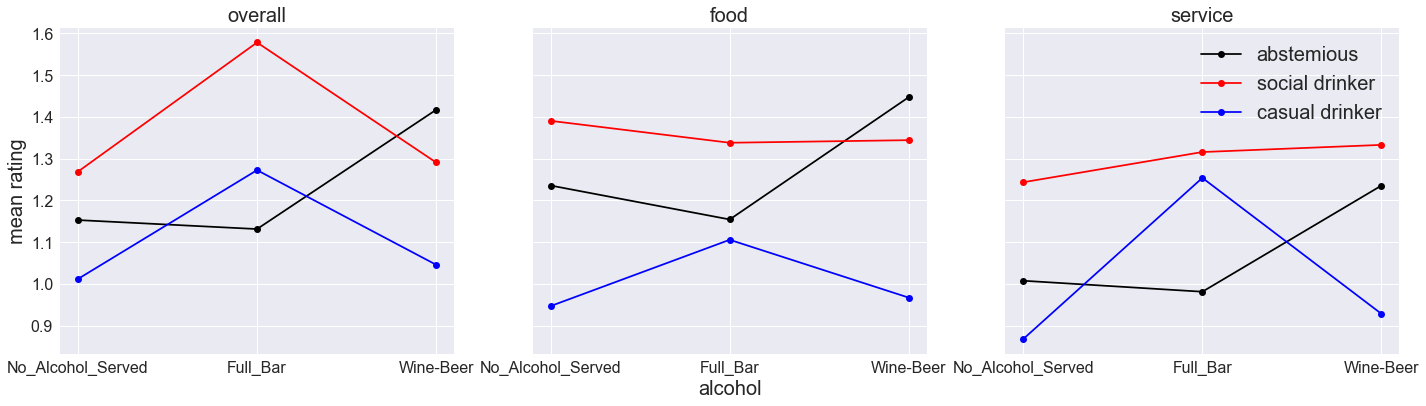

abstemious:
                    overall      food   service
No_Alcohol_Served  1.152724  1.235381  1.007545
Full_Bar           1.131250  1.154167  0.981250
Wine-Beer          1.416558  1.446861  1.235245

casual drinker:
                    overall      food   service
No_Alcohol_Served  1.011874  0.946976  0.868174
Full_Bar           1.272222  1.105556  1.253704
Wine-Beer          1.045852  0.967113  0.928460

social drinker:
                    overall      food   service
No_Alcohol_Served  1.268686  1.390192  1.243299
Full_Bar           1.577778  1.337778  1.315556
Wine-Beer          1.290646  1.343963  1.332653


In [54]:
# mean rating as a function of smoking alcohol, split into abstemious, 
# casual and social drinkers
y = plot_mean_rating_split(X[['alcohol']],user_info.drink_level)

print('abstemious:')
print(y['abstemious'])
print('\ncasual drinker:')
print(y['casual drinker'])
print('\nsocial drinker:')
print(y['social drinker'])

**Observations: ** Abstemious drinkers prefer **Wine-Beer**; casual drinkers prefer **Full_Bar**; but it's not so clear for social drinkers.
<br><br>
Let's check again if the trend we see above can be explained by **price**.

In [55]:
X.price[X.alcohol == 'No_Alcohol_Served'].value_counts()

medium    41
low       39
high       7
Name: price, dtype: int64

In [56]:
X.price[X.alcohol == 'Wine-Beer'].value_counts()

medium    15
high      14
low        5
Name: price, dtype: int64

In [57]:
X.price[X.alcohol == 'Full_Bar'].value_counts()

medium    4
high      4
low       1
Name: price, dtype: int64

**Observations: ** On average, the order of price is **Full_Bar** > **Wine-Beer** > **No_Alcohol_Served**, which does not explain the ratings drinkers of abstemious and social drinkers.

### Other Services

In [58]:
X.other_services.value_counts()

none        119
variety       7
Internet      4
Name: other_services, dtype: int64

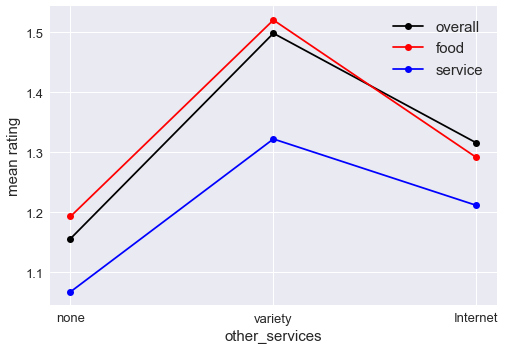

           overall      food   service
none      1.156273  1.193252  1.067643
variety   1.498639  1.520748  1.322449
Internet  1.315972  1.291667  1.211806


In [59]:
# mean rating as a function of other_services
plot_mean_rating(X[['other_services']])

**Observations: ** The order of rating is **Variety** > **Internet** > **None**, consistent with the amount of other service provided.
<br><br>
Again, is it just caused by **price**?

In [60]:
X.price[X.other_services == 'variety'].value_counts()

medium    4
low       2
high      1
Name: price, dtype: int64

In [61]:
X.price[X.other_services == 'Internet'].value_counts()

medium    3
high      1
Name: price, dtype: int64

In [62]:
X.price[X.other_services == 'none'].value_counts()

medium    53
low       43
high      23
Name: price, dtype: int64

**Observations: ** Restaurants with **Internet** actually have a higher mean price than those with **Variety**. So the ratings are indeed affected by the amount of other service provided.

### Dress Code

In [63]:
X.dress_code.value_counts()

informal    118
casual       10
formal        2
Name: dress_code, dtype: int64

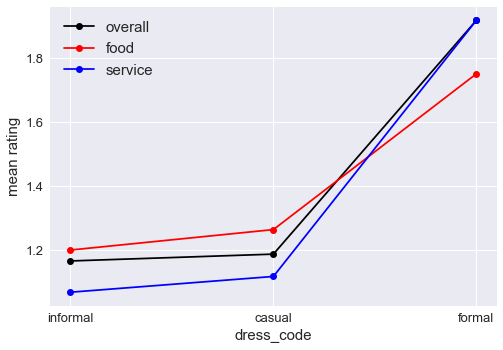

           overall      food   service
informal  1.166441  1.200562  1.068978
casual    1.187739  1.264256  1.118116
formal    1.916667  1.750000  1.916667


In [64]:
# mean rating as a function of dress code
plot_mean_rating(X[['dress_code']])

/Users/lyh/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in divide
  """


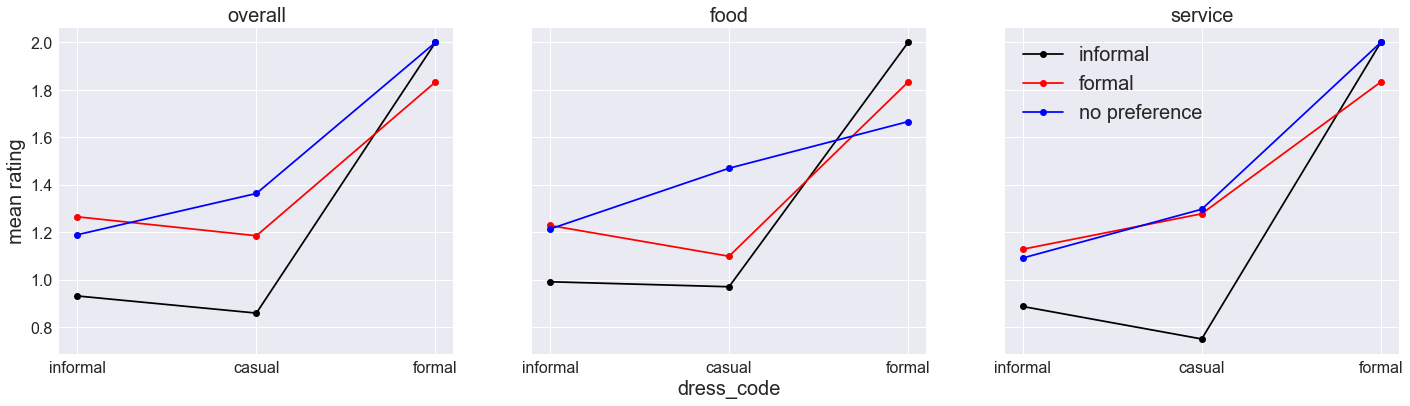

no preference:
           overall      food   service
informal  1.190018  1.214167  1.091982
casual    1.363889  1.470159  1.297381
formal    2.000000  1.666667  2.000000

informal:
          overall      food   service
informal  0.93213  0.991930  0.887945
casual    0.86000  0.970952  0.750952
formal    2.00000  2.000000  2.000000

formal:
           overall      food   service
informal  1.265572  1.229176  1.128978
casual    1.185802  1.099383  1.278395
formal    1.833333  1.833333  1.833333


In [65]:
# mean rating as a function of smoking alcohol, split into different 
# groups of consumers with different dress preferences
y = plot_mean_rating_split(X[['dress_code']],user_info.dress_preference)

print('no preference:')
print(y['no preference'])
print('\ninformal:')
print(y['informal'])
print('\nformal:')
print(y['formal'])

**Observations: ** Restaurants that require the customers to dress formally have the highest ratings. This is not a surprise because they should be expensive/high-class restaurants. Again, we can check the corresponding price in the following.

In [66]:
X.price[X.dress_code == 'formal'].value_counts()

medium    1
high      1
Name: price, dtype: int64

In [67]:
X.price[X.dress_code == 'informal'].value_counts()

medium    57
low       40
high      21
Name: price, dtype: int64

In [68]:
X.price[X.dress_code == 'casual'].value_counts()

low       5
high      3
medium    2
Name: price, dtype: int64

### Accessibility

In [69]:
X.accessibility.value_counts()

no_accessibility    76
completely          45
partially            9
Name: accessibility, dtype: int64

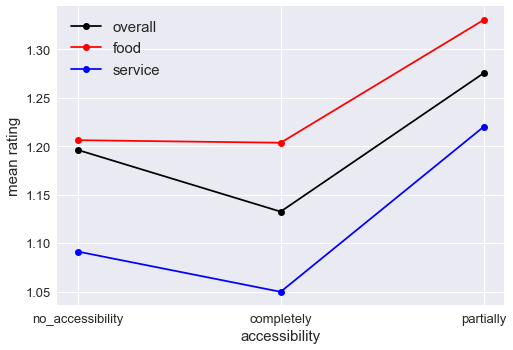

                   overall      food   service
no_accessibility  1.196189  1.206242  1.091278
completely        1.132494  1.203597  1.049709
partially         1.275356  1.330294  1.219991


In [70]:
# mean rating as a function of dress accessibility
plot_mean_rating(X[['accessibility']])

**Observations: ** If accessibility could affect the rating, we would expect **completely > partially > no_accessibility**. However, this is not we see here. In the following, we can see that the trend is simply due to price again.

In [71]:
X.price[X.accessibility == 'partially'].value_counts()

medium    8
low       1
Name: price, dtype: int64

In [72]:
X.price[X.accessibility == 'no_accessibility'].value_counts()

medium    39
high      23
low       14
Name: price, dtype: int64

In [73]:
X.price[X.accessibility == 'completely'].value_counts()

low       30
medium    13
high       2
Name: price, dtype: int64

### Area

In [74]:
X.area.value_counts()

closed    115
open       15
Name: area, dtype: int64

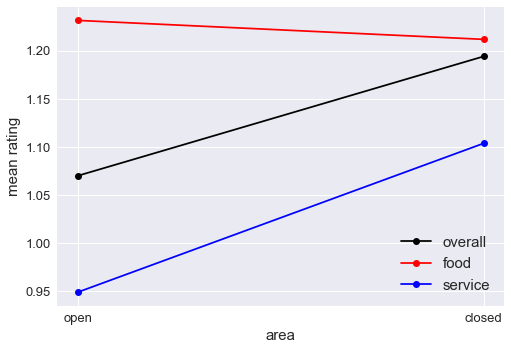

         overall      food   service
open    1.069992  1.231315  0.949101
closed  1.193921  1.211645  1.103630


In [75]:
# mean rating as a function of area
plot_mean_rating(X[['area']])

**Observations: ** Food rating does not depend on **area**, but from overall and service ratings, we can tell that consumers still prefer closed area over open area.

### Cuisine

In [76]:
# the number of restaurants for each cuisine type 
X.iloc[:,:23].sum()

Rcuisine_American             5.0
Rcuisine_Armenian             1.0
Rcuisine_Bakery               1.0
Rcuisine_Bar                 13.0
Rcuisine_Bar_Pub_Brewery      6.0
Rcuisine_Breakfast-Brunch     1.0
Rcuisine_Burgers              5.0
Rcuisine_Cafe-Coffee_Shop     1.0
Rcuisine_Cafeteria            9.0
Rcuisine_Chinese              3.0
Rcuisine_Contemporary         2.0
Rcuisine_Family               2.0
Rcuisine_Fast_Food            8.0
Rcuisine_Game                 1.0
Rcuisine_International        4.0
Rcuisine_Italian              4.0
Rcuisine_Japanese             5.0
Rcuisine_Mediterranean        1.0
Rcuisine_Mexican             28.0
Rcuisine_Pizzeria             5.0
Rcuisine_Regional             1.0
Rcuisine_Seafood              5.0
Rcuisine_Vietnamese           1.0
dtype: float64

In [77]:
# Besides Mexican, Cafeteria and Fast_Food, group the other types into 
# the following 5 types

X['Rcuisine_Bar_Pub'] = np.zeros(X.shape[0])
index = ((X.Rcuisine_Bar == 1) | (X.Rcuisine_Bar_Pub_Brewery == 1))
X.loc[index,'Rcuisine_Bar_Pub'] = 1

X['Rcuisine_Asian'] = np.zeros(X.shape[0])
index = ((X.Rcuisine_Chinese == 1) | (X.Rcuisine_Japanese == 1) | (X.Rcuisine_Vietnamese == 1))
X.loc[index,'Rcuisine_Asian'] = 1

X['Rcuisine_Western'] = np.zeros(X.shape[0])
index = ((X.Rcuisine_Armenian == 1) | (X.Rcuisine_Italian == 1) | (X.Rcuisine_Mediterranean == 1) 
         | (X.Rcuisine_Pizzeria == 1) | (X.Rcuisine_Seafood == 1))
X.loc[index,'Rcuisine_Western'] = 1

X['Rcuisine_American_Burgers'] = np.zeros(X.shape[0])
index = ((X.Rcuisine_American == 1) | (X.Rcuisine_Burgers == 1))
X.loc[index,'Rcuisine_American_Burgers'] = 1

X['Rcuisine_Others'] = np.zeros(X.shape[0])
index = (((X.Rcuisine_Bakery == 1) | (X["Rcuisine_Breakfast-Brunch"] == 1) | (X["Rcuisine_Cafe-Coffee_Shop"] == 1) 
        | (X.Rcuisine_Contemporary == 1) | (X.Rcuisine_Family == 1) | (X.Rcuisine_Game == 1) 
        | (X.Rcuisine_International == 1) | (X.Rcuisine_Regional == 1)))
X.loc[index,'Rcuisine_Others'] = 1

In [78]:
print("Number of restaurants for each type")
print("Mexican: {}".format(int(X.Rcuisine_Mexican.sum())))
print("American/Burgers: {}".format(int(X.Rcuisine_American_Burgers.sum())))
print("Asian: {}".format(int(X.Rcuisine_Asian.sum()))) 
print("Bar/Pub: {}".format(int(X.Rcuisine_Bar_Pub.sum()))) 
print("Cafeteria: {}".format(int(X.Rcuisine_Cafeteria.sum()))) 
print("Fast Food: {}".format(int(X.Rcuisine_Fast_Food.sum()))) 
print("Others: {}".format(int(X.Rcuisine_Others.sum())))
print("Western: {}".format(int(X.Rcuisine_Western.sum())))

Number of restaurants for each type
Mexican: 28
American/Burgers: 10
Asian: 9
Bar/Pub: 14
Cafeteria: 9
Fast Food: 8
Others: 13
Western: 16


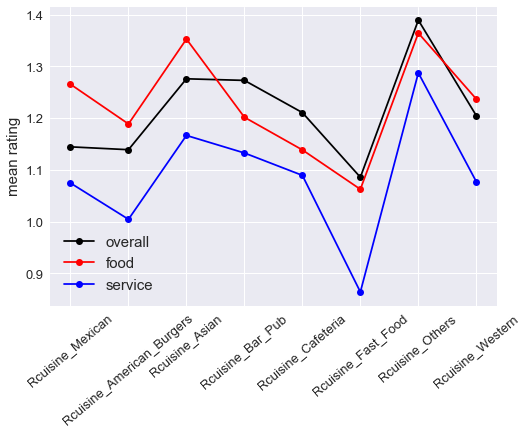

                            overall      food   service
Rcuisine_Mexican           1.144555  1.265529  1.074582
Rcuisine_American_Burgers  1.139048  1.188810  1.004524
Rcuisine_Asian             1.276089  1.352887  1.166612
Rcuisine_Bar_Pub           1.273005  1.201773  1.132715
Rcuisine_Cafeteria         1.210745  1.138655  1.089418
Rcuisine_Fast_Food         1.085827  1.062563  0.864078
Rcuisine_Others            1.389438  1.364469  1.287546
Rcuisine_Western           1.204843  1.236983  1.077241


In [79]:
columns = ['Rcuisine_Mexican','Rcuisine_American_Burgers', 'Rcuisine_Asian','Rcuisine_Bar_Pub', 'Rcuisine_Cafeteria',
           'Rcuisine_Fast_Food','Rcuisine_Others','Rcuisine_Western']
plot_mean_rating(X[columns],rotate=True)

Let's also check the correlation coefficients between these cuisine types and the ratings

In [80]:
X_cuisine = X[['Rcuisine_Mexican','Rcuisine_American_Burgers','Rcuisine_Asian','Rcuisine_Bar_Pub','Rcuisine_Cafeteria',
           'Rcuisine_Fast_Food','Rcuisine_Western','Rcuisine_Others']]

X_cuisine['Y_food'] = Y_food_mean
X_cuisine['Y_overall'] = Y_overall_mean
X_cuisine['Y_service'] = Y_service_mean

In [81]:
print(X_cuisine.corr()['Y_overall'][:-3])
print('\n')
print(X_cuisine.corr()['Y_food'][:-3])
print('\n')
print(X_cuisine.corr()['Y_service'][:-3])
print('\n')

Rcuisine_Mexican            -0.052793
Rcuisine_American_Burgers   -0.033656
Rcuisine_Asian               0.075600
Rcuisine_Bar_Pub             0.093221
Rcuisine_Cafeteria           0.024391
Rcuisine_Fast_Food          -0.069017
Rcuisine_Western             0.027151
Rcuisine_Others              0.200969
Name: Y_overall, dtype: float64


Rcuisine_Mexican             0.080017
Rcuisine_American_Burgers   -0.021444
Rcuisine_Asian               0.112147
Rcuisine_Bar_Pub            -0.012480
Rcuisine_Cafeteria          -0.060732
Rcuisine_Fast_Food          -0.114679
Rcuisine_Western             0.025572
Rcuisine_Others              0.148492
Name: Y_food, dtype: float64


Rcuisine_Mexican            -0.017664
Rcuisine_American_Burgers   -0.070513
Rcuisine_Asian               0.066238
Rcuisine_Bar_Pub             0.048983
Rcuisine_Cafeteria           0.002966
Rcuisine_Fast_Food          -0.170635
Rcuisine_Western            -0.009636
Rcuisine_Others              0.202107
Name: Y_service, dtype:

**Observations: ** Although the correlations are slightly different between different ratings, **Rcuisine_Others** generally gets higher ratings and **Rcuisine_Fast_Food** generally gets lower ratings. Asian restaurants perform really well at food rating. Interestingly, Mexican restaurants have above than average food rating but just roughly average overall and service ratings.  

## Conclusion

So what features affect the ratings? 
- **Price** is definitely one. In general, medium and high-price restaurants have better rating. However, it may be better to transform the original categories (low, medium, high) using dummy variables (one-hot encoding) instead of directly mapping them to numbers (such as 1,2,3). This is because we saw that people with different budget actually react differently on the price change.
<br><br>
- **Parking options** can affect the ratings too, but not the food rating. Also, it only matters to car owners. It's probably only necessary to distinguish between public parking and the other options (including no parking) because we saw that restaurants with public parking have significantly lower overall and service ratings.
<br><br>
- **Smoking Area** is only important for smokers. Especially, restaurants that do not allow smoking are low rated, and restaurants with their smoking area located at bar are highly rated.
<br><br>
- **Alcohol** is also relevant but different types of drinkers react differently on the change of alcohol service (No_Alcohol_Served, Wine-Beer, Full_Bar). Similar to **Price**, it may be better to transform the original three categories using dummy variables.
<br><br>
- **Other Services** has influence on the ratings. We saw that restaurants with a variety of other service perform better than those with only Internet. And those with Internet are better than those without other services.
<br><br>
- The effect of **Dress Code** on the ratings is probably due to **Price**. However, there are only two restaurants that require the customers to dress formally and their ratings are close to 2. Keeping a feature (0 or 1) to show whether a restaurant has formal dress code might be useful. When this condition is true, the ratings are essentially guaranteed to be very good.
<br><br>
- **Accessibility** does not affect the ratings. For **Area**, people prefer closed space over open space. For **Cuisine**, what restaurant/food types are relevant depend on which rating we are trying to predict. But in general, some types have significant influence. For example, fast food restaurants generally have low ratings. 